# Part II - Parameters that affect the duration of trips
## by Falilou Niang

## Investigation Overview

In this investigation, I wanted to look at parameters that can affect duration of trips. The main focus was on the user types, weekdays, hours.


## Dataset Overview

 The Ford Go-Bike dataset contains 183412 records of bike rentals in the bay-area in February 2019 and divided between 16 columns. The dataset gives informations about the attributes of each trips such as the duration, the start and end station and about users such as the date of birth or gender and user types.  274 rows were removed from the analysis due to inconsistencies or missing information.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_dataset.csv')

## Distribution of trips duration

By setting up a value limit of 5000 seconds, we can see that duration_sec has a very long-tailed distribution, with a lot of bike rides on the short duration end, and few on the long duration end. Outliers at the high end skewed the data. I plotted on a log-scale. From this graph we can see that the peak is less than 600 seconds and  the majority of trips are between 250 and 2000 seconds.


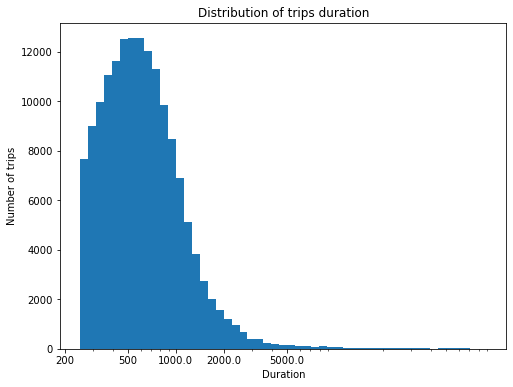

In [4]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8,6])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
tick_locs = [200, 500, 1e3, 2e3, 5e3] 
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.title('Distribution of trips duration')
plt.show()

## Average trips duration by weekdays

Though the amount of trips are more important in week days compared to weekends (as seen previously), they seem to be longer on average on Sundays and Saturdays

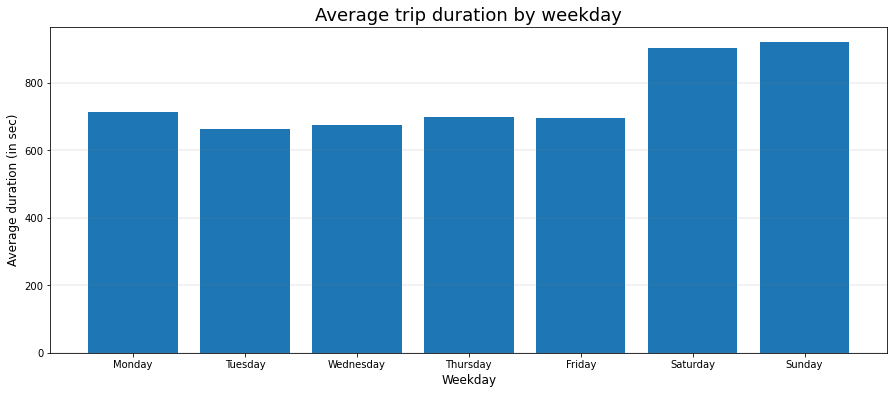

In [5]:
plt.figure(figsize=(15,6))
avg_min_duration_weekday = df.groupby('start_day')['duration_sec'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.bar(avg_min_duration_weekday['start_day'],avg_min_duration_weekday['duration_sec'], color='#1e77b4')

plt.title('Average trip duration by weekday', size=(18))
plt.xlabel('Weekday', size=12)
plt.ylabel('Average duration (in sec)', size=12)
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2);

## Average trips duration by Start Hours

 Average ride duration in an hour increases from midnight and reaches the peak at 2am. It's kind of unexpected to see a peak at 2am in the morning though. Then it decreases and rises again from 5am and reach another peak at 2pm with gradual decrease after that until mid-night.


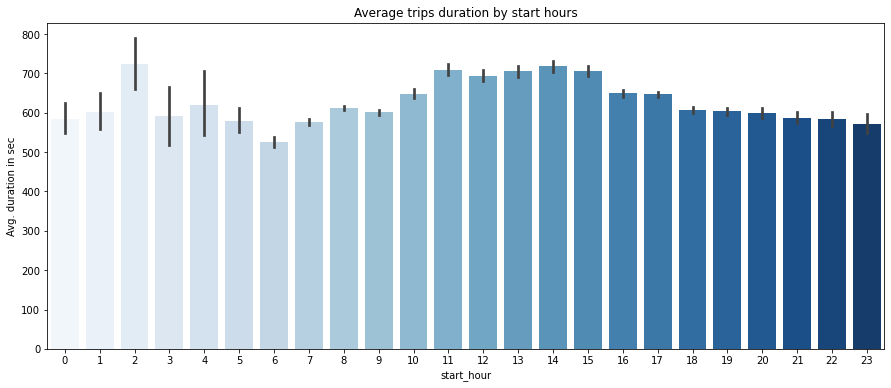

In [6]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_hour'] = df['start_time'].dt.hour
plt.figure(figsize=(15,6))
sb.barplot(data = df.query('duration_sec < 5000'), x = 'start_hour', y = 'duration_sec', 
            palette=  'Blues')
plt.ylabel('Avg. duration in sec')
plt.title('Average trips duration by start hours')
plt.show()

## Duration trips and user types by weekdays

Daily trip duration for customers are longer than subscribers.Both subscribers and customers take longer trips during weekend than weekdays. Customers take longer trips during the weekend.

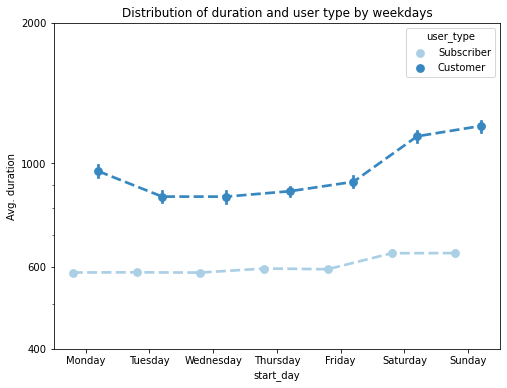

In [7]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df.query('duration_sec < 5000'), x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '--', dodge = 0.4,order=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Avg. duration')
plt.yscale('log')
plt.yticks([4e2, 6e2, 1e3,2e3], ['400', '600', '1000','2000'])
ax.set_yticklabels([],minor = True)
plt.title('Distribution of duration and user type by weekdays')
plt.show();

## 